## Parkinsons Telemonitoring Data Set
### Associated Tasks: Regression
### Number of Instances: 5875
### Number of Attributes:26

In [4]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import numpy as np
from pandas import *
import statsmodels.api as sm


In [7]:
df=DataFrame.from_csv('parkinsons_updrs.csv')

In [8]:
df

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,,,,,,,,,,,,,,,,,,,,,
1,72,0,5.64310,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.160060
1,72,0,12.66600,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.108100
1,72,0,19.68100,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.210140
1,72,0,25.64700,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.332770
1,72,0,33.64200,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.193610
1,72,0,40.65200,29.435,36.870,0.00353,0.000023,0.00119,0.00159,0.00357,...,0.214,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.195000
1,72,0,47.64900,29.682,37.363,0.00422,0.000024,0.00212,0.00221,0.00637,...,0.445,0.02376,0.02621,0.03488,0.07128,0.013260,22.506,0.49250,0.54779,0.175630
1,72,0,54.64000,29.928,37.857,0.00476,0.000025,0.00226,0.00259,0.00678,...,0.212,0.00979,0.01462,0.01911,0.02937,0.027969,22.929,0.47712,0.54234,0.238440
1,72,0,61.66900,30.177,38.353,0.00432,0.000029,0.00156,0.00207,0.00468,...,0.371,0.01774,0.02134,0.03451,0.05323,0.013381,22.078,0.51563,0.61864,0.200370


In [9]:
df.shape

(5875, 21)

In [12]:
df.index


Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 
            ...
            42, 42, 42, 42, 42, 42, 42, 42, 42, 42],
           dtype='int64', name=u'subject#', length=5875)

In [13]:
df.columns

Index([u'age', u'sex', u'test_time', u'motor_UPDRS', u'total_UPDRS',
       u'Jitter(%)', u'Jitter(Abs)', u'Jitter:RAP', u'Jitter:PPQ5',
       u'Jitter:DDP', u'Shimmer', u'Shimmer(dB)', u'Shimmer:APQ3',
       u'Shimmer:APQ5', u'Shimmer:APQ11', u'Shimmer:DDA', u'NHR', u'HNR',
       u'RPDE', u'DFA', u'PPE'],
      dtype='object')

In [15]:
df.tail()

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,,,,,,,,,,,,,,,,,,,,,
42,61,0,142.79,22.485,33.485,0.00406,0.000031,0.00167,0.00168,0.00500,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
42,61,0,149.84,21.988,32.988,0.00297,0.000025,0.00119,0.00147,0.00358,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
42,61,0,156.82,21.495,32.495,0.00349,0.000025,0.00152,0.00187,0.00456,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
42,61,0,163.73,21.007,32.007,0.00281,0.000020,0.00128,0.00151,0.00383,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204
42,61,0,170.73,20.513,31.513,0.00282,0.000021,0.00135,0.00166,0.00406,...,0.171,0.00946,0.01154,0.01470,0.02839,0.008172,23.259,0.58608,0.57077,0.15336


In [16]:
df.describe()

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,0.008962,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,0.009371,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,0.004730,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,0.006750,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,0.009870,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [20]:
df['age']

subject#
1     72
1     72
1     72
1     72
1     72
1     72
1     72
1     72
1     72
1     72
1     72
1     72
1     72
1     72
1     72
1     72
1     72
1     72
1     72
1     72
1     72
1     72
1     72
1     72
1     72
1     72
1     72
1     72
1     72
1     72
      ..
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
Name: age, dtype: int64

In [22]:
df.iloc[0] #Returns the first row as a series

age              72.000000
sex               0.000000
test_time         5.643100
motor_UPDRS      28.199000
total_UPDRS      34.398000
Jitter(%)         0.006620
Jitter(Abs)       0.000034
Jitter:RAP        0.004010
Jitter:PPQ5       0.003170
Jitter:DDP        0.012040
Shimmer           0.025650
Shimmer(dB)       0.230000
Shimmer:APQ3      0.014380
Shimmer:APQ5      0.013090
Shimmer:APQ11     0.016620
Shimmer:DDA       0.043140
NHR               0.014290
HNR              21.640000
RPDE              0.418880
DFA               0.548420
PPE               0.160060
Name: 1, dtype: float64

In [23]:
df.ix[42] #Returns all rows with index of 42

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,,,,,,,,,,,,,,,,,,,,,
42,61,0,-4.26250,19.725,28.633,0.01533,0.000118,0.00774,0.00800,0.02323,...,0.908,0.05904,0.05315,0.04576,0.17713,0.132810,11.689,0.70273,0.66975,0.484660
42,61,0,0.39583,20.026,29.034,0.00327,0.000029,0.00124,0.00166,0.00371,...,0.179,0.00916,0.01154,0.01890,0.02749,0.007624,23.109,0.59520,0.59125,0.158250
42,61,0,9.71040,20.626,29.835,0.01732,0.000108,0.00839,0.00810,0.02518,...,1.139,0.06688,0.08070,0.08343,0.20065,0.163430,12.365,0.74874,0.66782,0.481500
42,61,0,16.70800,21.078,30.437,0.00626,0.000052,0.00258,0.00329,0.00775,...,0.699,0.03911,0.04254,0.06426,0.11732,0.037384,16.169,0.65957,0.66943,0.254740
42,61,0,23.75800,21.533,31.044,0.00477,0.000038,0.00242,0.00258,0.00725,...,0.392,0.02653,0.02661,0.03154,0.07960,0.026170,20.117,0.56949,0.65745,0.211830
42,61,0,30.64200,21.977,31.636,0.00539,0.000044,0.00274,0.00267,0.00823,...,0.238,0.01215,0.01396,0.02156,0.03645,0.035331,21.279,0.60654,0.60615,0.223320
42,61,0,37.76900,22.437,32.249,0.00429,0.000036,0.00192,0.00218,0.00575,...,0.323,0.01900,0.02209,0.03043,0.05701,0.018272,21.959,0.51829,0.63520,0.188080
42,61,0,44.63700,22.880,32.840,0.00337,0.000030,0.00118,0.00159,0.00353,...,0.230,0.00960,0.01240,0.02485,0.02880,0.008673,22.902,0.61830,0.61587,0.165420
42,61,0,51.75900,23.339,33.452,0.00332,0.000023,0.00135,0.00160,0.00405,...,0.169,0.00812,0.01123,0.01674,0.02437,0.015746,23.725,0.58122,0.55884,0.143670


In [24]:
df['age'][42] #Returns all ages with index of 42

42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
      ..
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
42    61
Name: age, dtype: int64

In [29]:
ser=Series([1,2,3],index=['a','b','c'])#Create a series with index 
ser

a    1
b    2
c    3
dtype: int64

In [32]:
ser=Series({'a':1,'b':999})
ser
type(ser)

pandas.core.series.Series

In [34]:
df.iloc[:5] #Gives back first five rows

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,,,,,,,,,,,,,,,,,,,,,
1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [37]:
df[['age','sex']] #Returns age and sex

,age,sex
subject#,,
1,72,0
1,72,0
1,72,0
1,72,0
1,72,0
1,72,0
1,72,0
1,72,0
1,72,0


In [38]:
df.ix[[1,39]]#ix used for rows, returns data for subject 1 and 39

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,,,,,,,,,,,,,,,,,,,,,
1,72,0,5.64310,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.66600,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
1,72,0,19.68100,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
1,72,0,25.64700,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
1,72,0,33.64200,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
1,72,0,40.65200,29.435,36.870,0.00353,0.000023,0.00119,0.00159,0.00357,...,0.214,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.19500
1,72,0,47.64900,29.682,37.363,0.00422,0.000024,0.00212,0.00221,0.00637,...,0.445,0.02376,0.02621,0.03488,0.07128,0.013260,22.506,0.49250,0.54779,0.17563
1,72,0,54.64000,29.928,37.857,0.00476,0.000025,0.00226,0.00259,0.00678,...,0.212,0.00979,0.01462,0.01911,0.02937,0.027969,22.929,0.47712,0.54234,0.23844
1,72,0,61.66900,30.177,38.353,0.00432,0.000029,0.00156,0.00207,0.00468,...,0.371,0.01774,0.02134,0.03451,0.05323,0.013381,22.078,0.51563,0.61864,0.20037


In [39]:
df.columns

Index([u'age', u'sex', u'test_time', u'motor_UPDRS', u'total_UPDRS',
       u'Jitter(%)', u'Jitter(Abs)', u'Jitter:RAP', u'Jitter:PPQ5',
       u'Jitter:DDP', u'Shimmer', u'Shimmer(dB)', u'Shimmer:APQ3',
       u'Shimmer:APQ5', u'Shimmer:APQ11', u'Shimmer:DDA', u'NHR', u'HNR',
       u'RPDE', u'DFA', u'PPE'],
      dtype='object')

In [42]:
y='total_UPDRS'#dependent variable


'total_UPDRS'

In [44]:
predictors=[colname for colname in df.columns if colname not in ['motor_UPDRS','total_UPDRS']]
predictors

['age',
 'sex',
 'test_time',
 'Jitter(%)',
 'Jitter(Abs)',
 'Jitter:RAP',
 'Jitter:PPQ5',
 'Jitter:DDP',
 'Shimmer',
 'Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:APQ11',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'PPE']

In [48]:
df[predictors]#shows the predictors

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,,,,,,,,,,,,,,,,,,,
1,72,0,5.64310,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.160060
1,72,0,12.66600,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.108100
1,72,0,19.68100,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.210140
1,72,0,25.64700,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.332770
1,72,0,33.64200,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.193610
1,72,0,40.65200,0.00353,0.000023,0.00119,0.00159,0.00357,0.02227,0.214,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.195000
1,72,0,47.64900,0.00422,0.000024,0.00212,0.00221,0.00637,0.04352,0.445,0.02376,0.02621,0.03488,0.07128,0.013260,22.506,0.49250,0.54779,0.175630
1,72,0,54.64000,0.00476,0.000025,0.00226,0.00259,0.00678,0.02191,0.212,0.00979,0.01462,0.01911,0.02937,0.027969,22.929,0.47712,0.54234,0.238440
1,72,0,61.66900,0.00432,0.000029,0.00156,0.00207,0.00468,0.04296,0.371,0.01774,0.02134,0.03451,0.05323,0.013381,22.078,0.51563,0.61864,0.200370


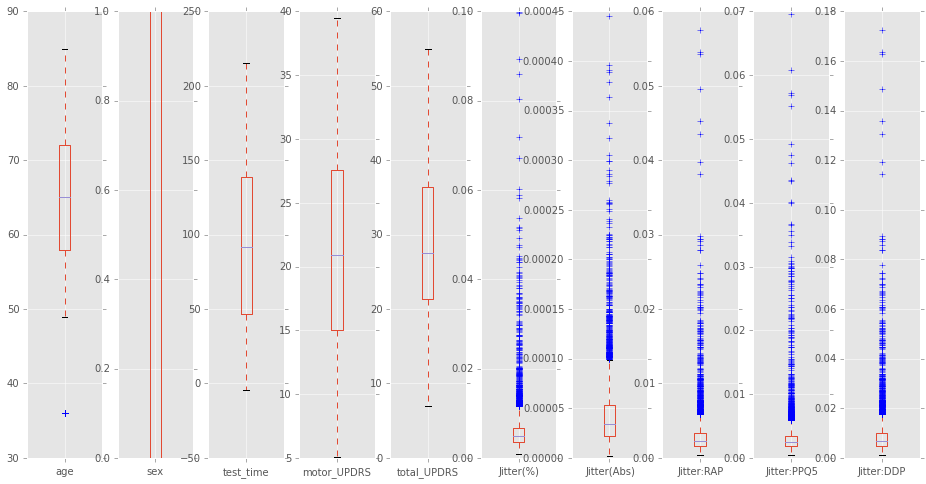

In [53]:
boxplots1=df[df.columns[:10]].plot(subplots=True, kind='box',figsize=(16,8)) #Make individua box plot for each datacolumn

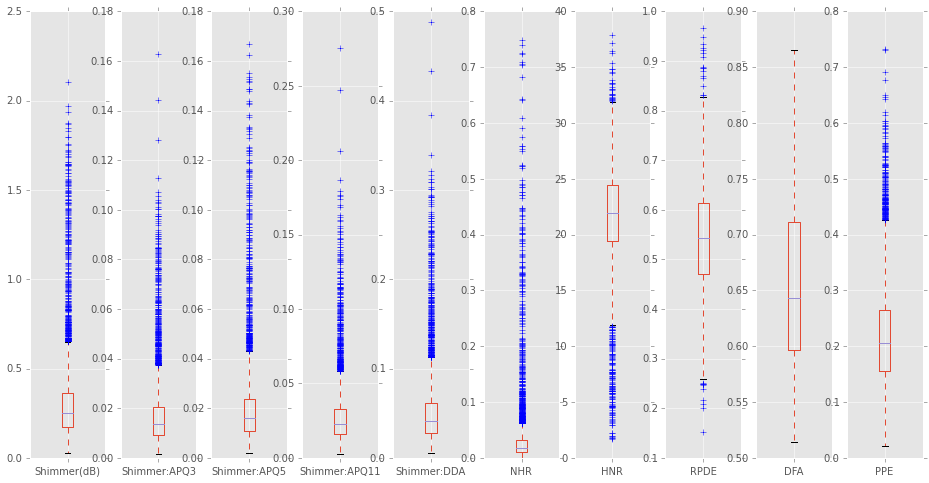

In [54]:
boxplots1=df[df.columns[11:]].plot(subplots=True, kind='box',figsize=(16,8))
#Boxplot applied to a dataframe

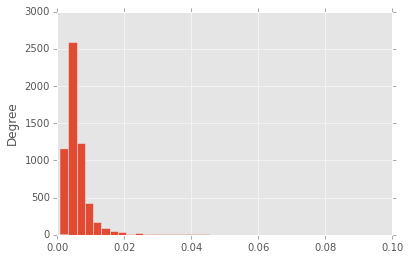

In [55]:
hist1=df['Jitter(%)'].plot(kind='hist',bins=40) 
#Distribution is right skewed, histogram made of series data

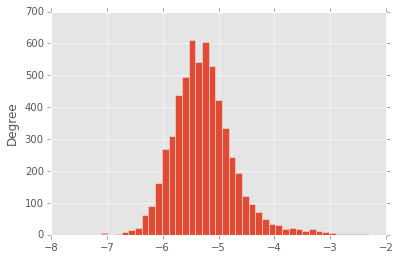

In [59]:
hist1_log=df['Jitter(%)'].apply(np.log)
#Applied log transformation to skewed data to make it normal 
# we want input to the linear model to be roughly normally distributed
hist2=(hist1_log).plot(kind='hist',bins=40) 

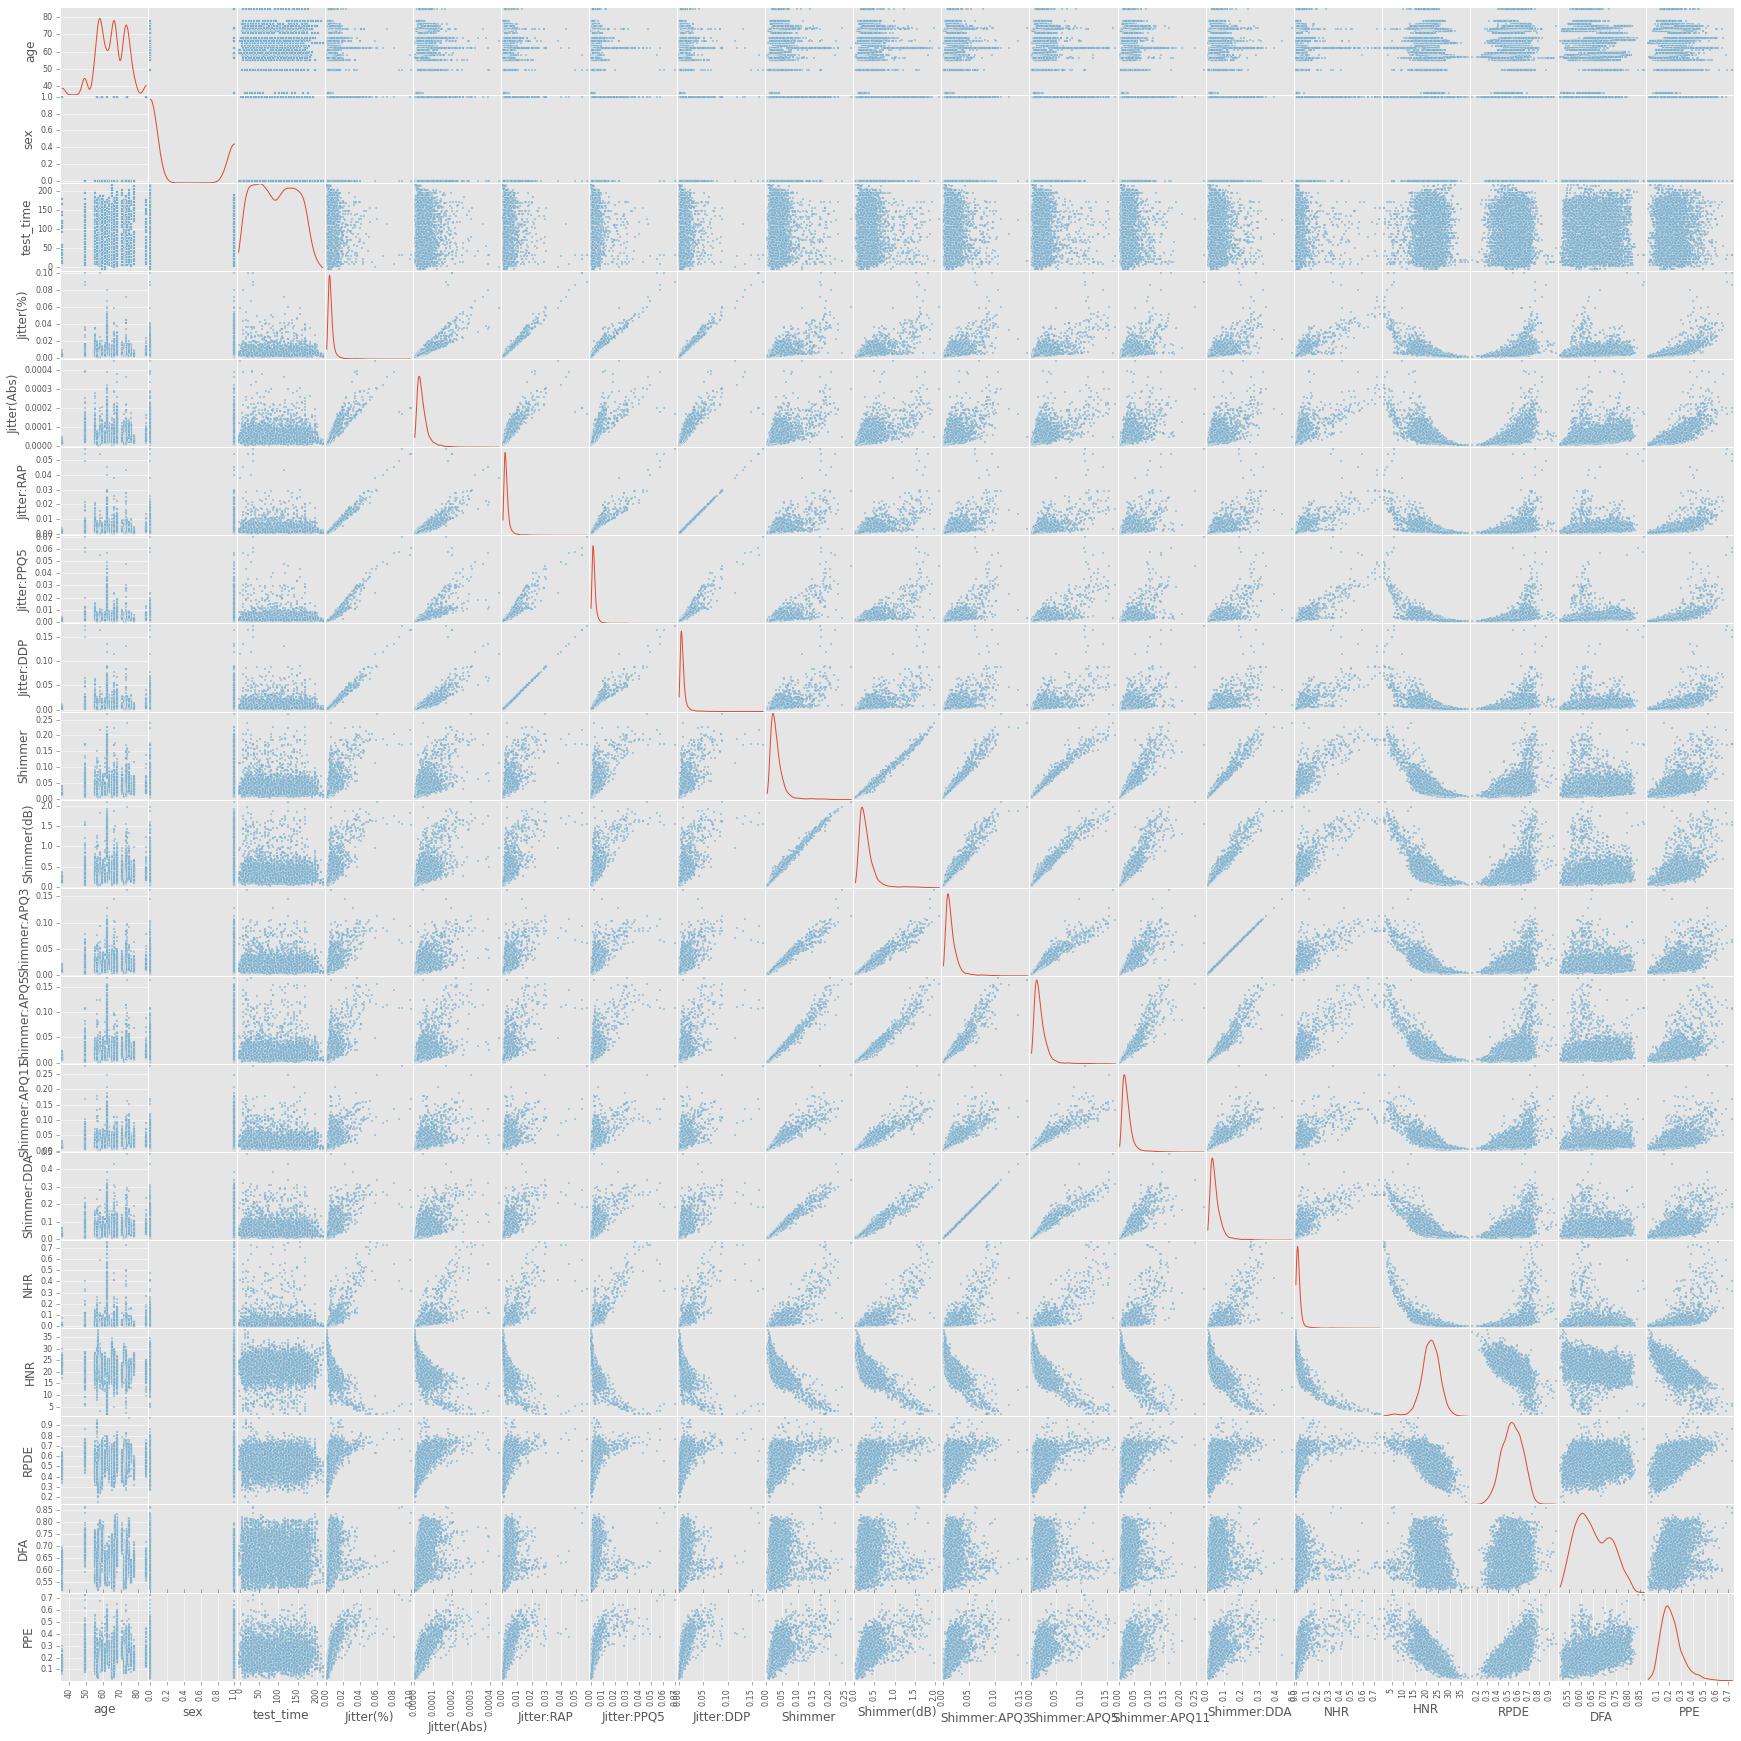

In [61]:
from pandas.tools.plotting import scatter_matrix
plot =scatter_matrix(df[predictors],diagonal='kde',figsize=(30,30))

In [62]:
predictors #Some predictors are highly correlated

['age',
 'sex',
 'test_time',
 'Jitter(%)',
 'Jitter(Abs)',
 'Jitter:RAP',
 'Jitter:PPQ5',
 'Jitter:DDP',
 'Shimmer',
 'Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:APQ11',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'PPE']

In [63]:
predictors.remove('Jitter:DDP')#Manual removal of correlated variables
predictors.remove('Shimmer:DDA')
predictors

['age',
 'sex',
 'test_time',
 'Jitter(%)',
 'Jitter(Abs)',
 'Jitter:RAP',
 'Jitter:PPQ5',
 'Shimmer',
 'Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:APQ11',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'PPE']

In [70]:
predictors_log=[predictor for predictor in predictors if any(lookforstring in predictor for lookforstring in ['Shimmer','Jitter','NHR', 'PPE'])]
# All Jitter and Shimmer variables as well as NHR &PPE are right skewed so log transformation
predictors_log


['Jitter(%)',
 'Jitter(Abs)',
 'Jitter:RAP',
 'Jitter:PPQ5',
 'Shimmer',
 'Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:APQ11',
 'NHR',
 'PPE']

In [71]:
df.apply(np.log) #Applying log to all columns of dataframe which is not required
#Every column in dataframe is a panda series

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,,,,,,,,,,,,,,,,,,,,,
1,4.276666,-inf,1.730434,3.339287,3.537998,-5.017660,-10.295050,-5.518964,-5.754024,-4.419521,...,-1.469676,-4.241917,-4.335907,-4.097148,-3.143305,-4.248195,3.074543,-0.870171,-0.600714,-1.832207
1,4.276666,-inf,2.538921,3.348043,3.552315,-5.809143,-10.994132,-6.630124,-6.502290,-5.534040,...,-1.720369,-4.611188,-4.535644,-4.081034,-3.512576,-4.499730,3.302592,-0.832570,-0.571337,-2.224699
1,4.276666,-inf,2.979654,3.356723,3.566401,-5.337058,-10.611951,-6.189915,-6.175387,-5.089679,...,-1.709258,-4.914416,-4.774773,-4.228105,-3.815804,-3.901083,3.137536,-0.771714,-0.608714,-1.559981
1,4.276666,-inf,3.244427,3.364015,3.578227,-5.243829,-10.535728,-6.260652,-5.936976,-5.162040,...,-1.117795,-4.504420,-4.370098,-3.930696,-3.406109,-3.581389,3.196426,-0.718875,-0.548285,-1.100304
1,4.276666,-inf,3.515775,3.373723,3.593882,-5.698795,-10.812803,-6.980326,-6.645391,-5.885304,...,-1.737271,-4.992304,-4.678817,-4.006883,-3.894183,-4.454597,3.262931,-0.751031,-0.577642,-1.641909
1,4.276666,-inf,3.705048,3.382184,3.607398,-5.646457,-10.684374,-6.733802,-6.444021,-5.635190,...,-1.541779,-4.599188,-4.314742,-3.788479,-3.500245,-4.663011,3.133144,-0.617131,-0.557865,-1.634756
1,4.276666,-inf,3.863862,3.390541,3.620681,-5.467920,-10.635791,-6.156339,-6.114763,-5.056156,...,-0.809681,-3.739752,-3.641614,-3.355842,-2.641139,-4.323003,3.113782,-0.708261,-0.601863,-1.739376
1,4.276666,-inf,4.000766,3.398794,3.633816,-5.347508,-10.608303,-6.092390,-5.956097,-4.993778,...,-1.551169,-4.626394,-4.225365,-3.957544,-3.527782,-3.576659,3.132402,-0.739987,-0.611862,-1.433638
1,4.276666,-inf,4.121781,3.407080,3.646833,-5.444500,-10.464204,-6.463069,-6.180207,-5.364457,...,-0.991553,-4.031933,-3.847172,-3.366506,-2.933133,-4.313919,3.094582,-0.662366,-0.480232,-1.607590


In [73]:
def log_req_col(series):
    if series.name in predictors_log:
        return np.log(series)
    else:
        return series
    
final_df=df.apply(log_req_col)

In [74]:
final_df #Final dataframe of predictors with log applied where required

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,,,,,,,,,,,,,,,,,,,,,
1,72,0,5.64310,28.199,34.398,-5.017660,-10.295050,-5.518964,-5.754024,0.01204,...,-1.469676,-4.241917,-4.335907,-4.097148,0.04314,-4.248195,21.640,0.41888,0.54842,-1.832207
1,72,0,12.66600,28.447,34.894,-5.809143,-10.994132,-6.630124,-6.502290,0.00395,...,-1.720369,-4.611188,-4.535644,-4.081034,0.02982,-4.499730,27.183,0.43493,0.56477,-2.224699
1,72,0,19.68100,28.695,35.389,-5.337058,-10.611951,-6.189915,-6.175387,0.00616,...,-1.709258,-4.914416,-4.774773,-4.228105,0.02202,-3.901083,23.047,0.46222,0.54405,-1.559981
1,72,0,25.64700,28.905,35.810,-5.243829,-10.535728,-6.260652,-5.936976,0.00573,...,-1.117795,-4.504420,-4.370098,-3.930696,0.03317,-3.581389,24.445,0.48730,0.57794,-1.100304
1,72,0,33.64200,29.187,36.375,-5.698795,-10.812803,-6.980326,-6.645391,0.00278,...,-1.737271,-4.992304,-4.678817,-4.006883,0.02036,-4.454597,26.126,0.47188,0.56122,-1.641909
1,72,0,40.65200,29.435,36.870,-5.646457,-10.684374,-6.733802,-6.444021,0.00357,...,-1.541779,-4.599188,-4.314742,-3.788479,0.03019,-4.663011,22.946,0.53949,0.57243,-1.634756
1,72,0,47.64900,29.682,37.363,-5.467920,-10.635791,-6.156339,-6.114763,0.00637,...,-0.809681,-3.739752,-3.641614,-3.355842,0.07128,-4.323003,22.506,0.49250,0.54779,-1.739376
1,72,0,54.64000,29.928,37.857,-5.347508,-10.608303,-6.092390,-5.956097,0.00678,...,-1.551169,-4.626394,-4.225365,-3.957544,0.02937,-3.576659,22.929,0.47712,0.54234,-1.433638
1,72,0,61.66900,30.177,38.353,-5.444500,-10.464204,-6.463069,-6.180207,0.00468,...,-0.991553,-4.031933,-3.847172,-3.366506,0.05323,-4.313919,22.078,0.51563,0.61864,-1.607590


In [78]:
final_df=df.apply(lambda series:np.log(series)if series.name in predictors_log else series)
final_df.head()
#Alternate to the above function procedure

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,,,,,,,,,,,,,,,,,,,,,
1,72,0,5.6431,28.199,34.398,-5.017660,-10.295050,-5.518964,-5.754024,0.01204,...,-1.469676,-4.241917,-4.335907,-4.097148,0.04314,-4.248195,21.640,0.41888,0.54842,-1.832207
1,72,0,12.6660,28.447,34.894,-5.809143,-10.994132,-6.630124,-6.502290,0.00395,...,-1.720369,-4.611188,-4.535644,-4.081034,0.02982,-4.499730,27.183,0.43493,0.56477,-2.224699
1,72,0,19.6810,28.695,35.389,-5.337058,-10.611951,-6.189915,-6.175387,0.00616,...,-1.709258,-4.914416,-4.774773,-4.228105,0.02202,-3.901083,23.047,0.46222,0.54405,-1.559981
1,72,0,25.6470,28.905,35.810,-5.243829,-10.535728,-6.260652,-5.936976,0.00573,...,-1.117795,-4.504420,-4.370098,-3.930696,0.03317,-3.581389,24.445,0.48730,0.57794,-1.100304
1,72,0,33.6420,29.187,36.375,-5.698795,-10.812803,-6.980326,-6.645391,0.00278,...,-1.737271,-4.992304,-4.678817,-4.006883,0.02036,-4.454597,26.126,0.47188,0.56122,-1.641909


In [82]:
model=sm.OLS(final_df[y],exog=final_df[predictors])
results=model.fit()
results.summary()
#OLS model, first specify the dependent and then independent variables
# Lot of coefficients are statistically significant as p-value close to zero

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_UPDRS   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     3159.
Date:                Tue, 26 Jan 2016   Prob (F-statistic):               0.00
Time:                        21:29:36   Log-Likelihood:                -21685.
No. Observations:                5875   AIC:                         4.340e+04
Df Residuals:                    5858   BIC:                         4.352e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
age               0.3279      0.015     21.868      0.000         0.299     0.357
sex              -4.0930      0.379    -10.786      0.000        -4.837    -3.349
test_time         0.0171      0.002      7.183      0.000         0.012     0.022
Jitter(%)         0.8221      1.591      0.517      0.605        -2.297     3.941
Jitter(Abs)      -4.8737      0.608     -8.012      0.000        -6.066    -3.681
Jitter:RAP        5.4035      1.128      4.790      0.000         3.192     7.615
Jitter:PPQ5      -1.7370      1.143     -1.520      0.129        -3.978     0.504
Shimmer           1.9208      3.100      0.620      0.536        -4.157     7.999
Shimmer(dB)       0.8888      1.556      0.571      0.568        -2.162     3.940
Shimmer:APQ3     -2.3216      1.841     -1.261      0.207        -5.931     1.287
Shimmer:APQ5     -8.9046      1.970     -4.520      0.000       -12.766    -5.043
Shimmer:APQ11     6.6767      1.268      5.266      0.000         4.191     9.162
NHR              -1.4431      0.363     -3.972      0.000        -2.155    -0.731
HNR              -0.8093      0.082     -9.879      0.000        -0.970    -0.649
RPDE              7.8670      1.762      4.466      0.000         4.413    11.321
DFA             -27.0267      2.008    -13.459      0.000       -30.963   -23.090
PPE               2.4926      0.634      3.932      0.000         1.250     3.735
==============================================================================
Omnibus:                      172.258   Durbin-Watson:                   0.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.346
Skew:                           0.400   Prob(JB):                     5.09e-39
Kurtosis:                       2.718   Cond. No.                     3.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
mo